## Лабораторная работа 2. Коррекция яркости и цвета
### Водяный Михаил, РИМ-181228

In [1]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Автоконтраст черно-белого изображения

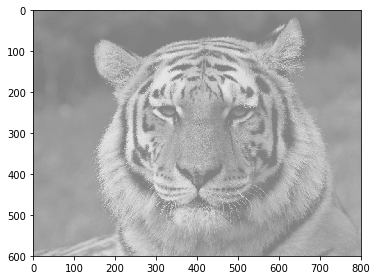

In [2]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
imshow(img)

In [3]:
def autocontrast(img):
    x_min = min(img.ravel())
    x_max = max(img.ravel())
    k = 255/(x_max-x_min)
    img = ((img-x_min)*k).astype('uint8')
    return img

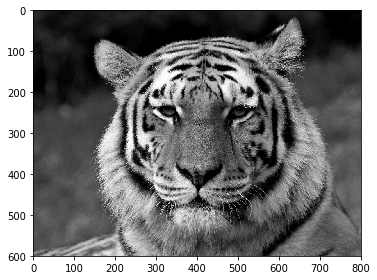

In [4]:
contrasted_img = autocontrast(img)
imshow(contrasted_img)

In [5]:
contrast_answer = imread("https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png")
np.array_equal(contrast_answer, contrasted_img)

True

### Подсчет минимума и максимума устойчивого автоконтраста

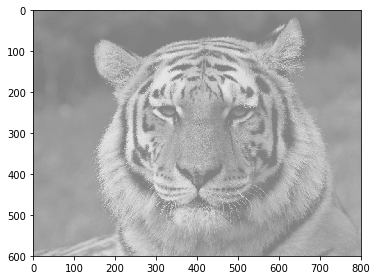

In [6]:
img_low_contrast = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
imshow(img_low_contrast)

In [7]:
img_tmp = img_low_contrast.astype('float')
x = round(img_tmp.shape[0] * img_tmp.shape[1] * 0.05)
img_tmp = img_tmp.ravel()
img_tmp.sort()
x_min = img_tmp[x]
x_max = img_tmp[len(img_tmp) - x]
print(x_min,x_max)

129.0 208.0


### Устойчивый автоконтраст черно-белого изображения

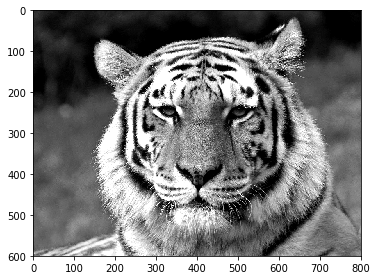

In [8]:
coef = 255/(x_max - x_min)
img_stable_contrasted = (img - x_min) * coef
img_stable_contrasted = np.clip(img_stable_contrasted,0,255).astype('uint8')
imshow(img_stable_contrasted);

In [9]:
stable_contrast_answer = imread("https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png")
np.array_equal(img_stable_contrasted, stable_contrast_answer)

True

### Устойчивый цветной автоконтраст

In [10]:
img = imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')

In [11]:
img = img_as_float(img)
#rgb to yuv
Y = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
U = -0.0999 * img[:,:,0] - 0.336 * img[:,:,1] + 0.436 * img[:,:,2]
V = 0.615 * img[:,:,0] - 0.5586 * img[:,:,1] - 0.0563 * img[:,:,2]

#stable autocontrast
k = round(int(Y.shape[0] * Y.shape[1] * 0.05))
Y_sort = Y.copy()
Y_sort = Y_sort.ravel()
Y_sort.sort()
Y_min = Y_sort[k]
Y_max = Y_sort[len(Y_sort) - k]
coef = 1/(Y_max - Y_min)
Y_out = (Y - Y_min) * coef

Y_out = np.clip(Y_out,0,1)

#to rgb
R = Y_out + 1.2803 * V
G = Y_out - 0.2148 * U - 0.3805 * V
B = Y_out + 2.1279 * U

img_color_autocontrasted = np.dstack((R,G,B))

img_color_autocontrasted = np.clip(img_color_autocontrasted,0,1)
img_color_autocontrasted = img_as_ubyte(img_color_autocontrasted)

D:\Programs\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [12]:
answer_stable_color = imread("https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png")
np.array_equal(answer_stable_color, img_color_autocontrasted)

True

### Преобразование серого мира
if only ;(

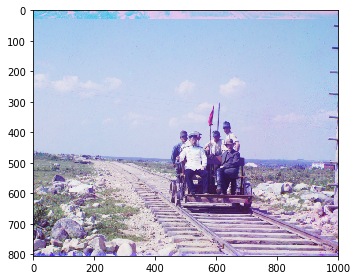

In [13]:
img = imread("https://stepik.org/media/attachments/lesson/60610/railroad.png")
imshow(img)

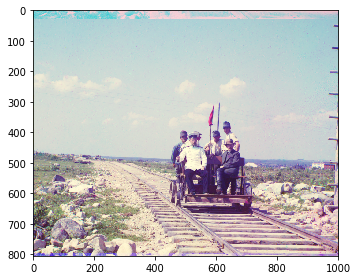

In [14]:
img = img_as_float(img)
R_avg = np.mean(img[:,:,0])
G_avg = np.mean(img[:,:,1])
B_avg = np.mean(img[:,:,2])
Avg = (R_avg + G_avg + B_avg) / 3
r_w = R_avg / Avg
g_w = G_avg / Avg
b_w = B_avg / Avg


R = img[:,:,0] / r_w
G = img[:,:,1] / g_w
B = img[:,:,2] / b_w

img_gay_world = np.dstack((R,G,B))

img_gay_world = np.clip(img_gay_world,0,1)
img_gay_world = img_as_ubyte(img_gay_world)
imshow(img_gay_world);

In [15]:
img_gray_world_answer = imread("https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png")
np.array_equal(img_gay_world,img_gray_world_answer)

True

### Выравнивание гистограммы

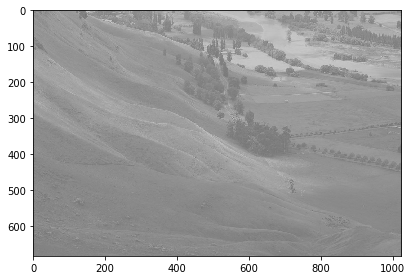

In [16]:
img = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
imshow(img);

Text(0.5, 1.0, 'Гистограмма исходного изображения')

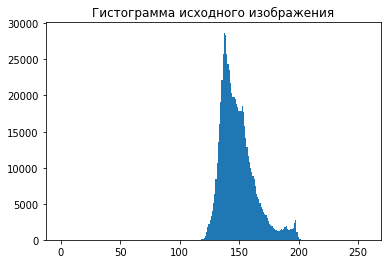

In [17]:
values, bin_edges, patches = plt.hist(img.ravel(), bins = range(257))
plt.title('Гистограмма исходного изображения')

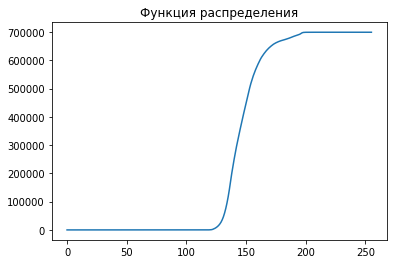

In [18]:
cdf = np.cumsum(values)
plt.title('Функция распределения')
plt.plot(cdf);

In [19]:
img_res = img
min_cdf = np.min(cdf[np.nonzero(cdf)])
coef = 255/(img.size - 1)
for i in range(img_res.shape[0]):
    for j in range(img_res.shape[1]):
        img_tmp = cdf[img_res[i,j]] - min_cdf
        img_tmp = img_tmp * coef
        img_res[i,j] = img_tmp.round()

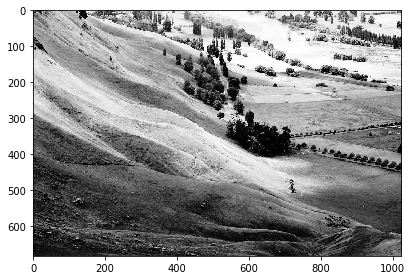

In [20]:
img_res = img_as_ubyte(img_res)
imshow(img_res);

Text(0.5, 1.0, 'Гистограмма полученного изображения')

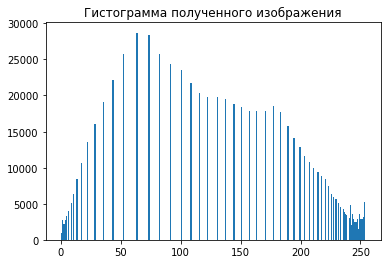

In [23]:
plt.hist(img_res.ravel(), bins=range(255))
plt.title('Гистограмма полученного изображения')

In [22]:
answer_histeq = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')
np.array_equal(answer_histeq, img_res)

True